<a href="https://colab.research.google.com/github/MUHAMMAD-IJLAL-061/social-media-dashboard/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
from google.colab import drive
drive.mount('/content/drive')

import os

# 🔧 Folder path in your Google Drive
project_path = "/content/drive/MyDrive/ Social-Media-Addiction/"
os.makedirs(project_path, exist_ok=True)
print(f"✅ Project folder ready at: {project_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Project folder ready at: /content/drive/MyDrive/ Social-Media-Addiction/


username: muhammadijlal061

key: 74ade080bbaeea6bb61b02657de2e928

In [17]:
!pip install opendatasets

In [18]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/rehan497/students-social-media-addiction")

Skipping, found downloaded files in "./students-social-media-addiction" (use force=True to force download)


In [19]:
import pandas as pd
df = pd.read_csv("/content/students-social-media-addiction/Students Social Media Addiction.csv")
# Save to Drive
df.to_csv(project_path + "social_media_addiction.csv", index=False)
print("✅ social_media_data.csv created successfully!")

✅ social_media_data.csv created successfully!


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = project_path + "social_media_addiction.csv"
df = pd.read_csv(file_path)
print("✅ Data Loaded Successfully!\n")

✅ Data Loaded Successfully!



In [ ]:
# Clean data
df.dropna(inplace=True)
df = df[df["Avg_Daily_Usage_Hours"] > 0]
df = df[df["Sleep_Hours_Per_Night"] > 0]
df = df[df["Mental_Health_Score"] > 0]
df = df[df["Addicted_Score"] > 0]

print("✅ Data cleaned. Ready for analysis.\n")

✅ Data cleaned. Ready for analysis.



In [15]:
import pandas as pd
import io
data_string = """
Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7
"""
numeric_cols = ['Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 'Mental_Health_Score', 'Addicted_Score']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
platform_usage_summary = df.groupby('Most_Used_Platform')['Avg_Daily_Usage_Hours'].mean().sort_values(ascending=False)
academic_addiction_summary = df.groupby('Academic_Level')['Addicted_Score'].mean()
mental_health_by_impact = df.groupby('Affects_Academic_Performance')['Mental_Health_Score'].mean()

/tmp/ipython-input-4243108149.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-4243108149.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-4243108149.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


✅ Charts saved to folder: /content/drive/MyDrive/ Social-Media-Addiction/charts/
✅ Cleaned data exported to: /content/drive/MyDrive/ Social-Media-Addiction/cleaned_social_media_addiction.csv


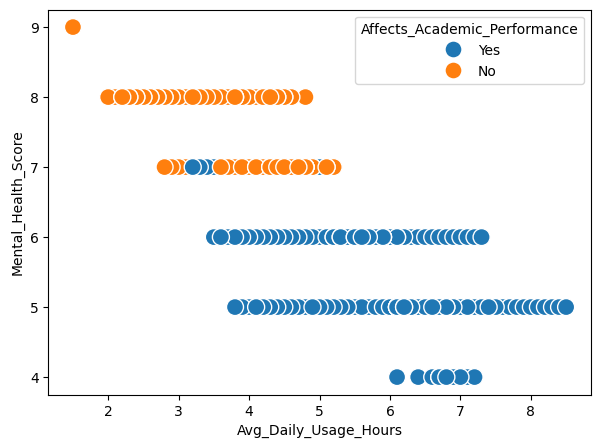

In [21]:
charts_path = os.path.join(project_path, "charts/")
os.makedirs(charts_path, exist_ok=True)

# Visualization 1 — Sales by Product
plt.figure(figsize=(7, 5))
sns.barplot(
    x='Most_Used_Platform',
    y='Avg_Daily_Usage_Hours',
    data=df,
    errorbar=None,
    palette="viridis")
plt.title('1. Average Daily Usage Hours by Platform', fontsize=14)
plt.xlabel('Most Used Platform')
plt.ylabel('Avg. Usage (Hours)')
plt.xticks(rotation=30, ha='right')
plt.savefig(charts_path + "Daily_Usage.png")
plt.close()

# Visualization 2 — Sales by Region
plt.figure(figsize=(7, 5))
sns.scatterplot(
    x='Avg_Daily_Usage_Hours',
    y='Mental_Health_Score',
    hue='Affects_Academic_Performance',
    data=df,
    s=150
)

# Visualization 3 — Monthly Trend
plt.figure(figsize=(7, 5))
sns.histplot(
    df['Addicted_Score'],
    kde=True,
    bins=range(int(df['Addicted_Score'].min()), int(df['Addicted_Score'].max()) + 2),
    color="darkorange"
)
plt.title('3. Distribution of Addiction Scores', fontsize=14)
plt.xlabel('Addicted Score')
plt.ylabel('Count of Students')
plt.savefig(charts_path + "Distribution_of_Addiction_Scores.png")
plt.close()

#visualization 4
plt.figure(figsize=(7, 5))
sns.boxplot(
    x='Academic_Level',
    y='Sleep_Hours_Per_Night',
    data=df,
    palette="pastel"
)
plt.title('4. Sleep Hours Distribution by Academic Level', fontsize=14)
plt.xlabel('Academic Level')
plt.ylabel('Sleep Hours Per Night')
plt.savefig(charts_path + "Distribution_by_Academic_Level.png")
plt.close()
#visualization 5
plt.figure(figsize=(7, 5))
sns.countplot(
    x='Affects_Academic_Performance',
    data=df,
    palette="magma"
)

plt.close()

print(f"✅ Charts saved to folder: {charts_path}")

# Export cleaned data
cleaned_path = project_path + "cleaned_social_media_addiction.csv"
df.to_csv(cleaned_path, index=False)
print(f"✅ Cleaned data exported to: {cleaned_path}")